# **포드 중고차 가격 예측**

https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

## 0. 데이터 불러오기

1.model - > Ford Car Brands

2.year - >Production Year

3.price - >Price of car in $

4.transmission - > Automatic,Manual, Semi-Auto

5.mileage -> Number of miles traveled

6.fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other

7.tax -> Annual Tax

8.mpg - > Miles per Gallon

9.engineSize - > Car's Engine Size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cars = pd.read_csv("/content/drive/MyDrive/ford.csv")

## 1. EDA

In [4]:
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
cars.shape #17966개의 행, 9개의 열

(17966, 9)

In [6]:
cars.info() #결측치는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
cars.isna().sum() #다시 확인

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### 1. model

In [8]:
cars['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

### 2. year

In [9]:
cars['year'].unique() #2060년 이상치

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060])

In [10]:
cars[cars['year']==2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


### 3. tax

In [11]:
cars['tax'].unique()

array([150, 145,   0,  20, 160, 125,  30, 235, 240, 200, 165, 140, 570,
       205, 260, 580, 135, 265, 300, 195, 120, 555, 325, 155, 270, 115,
       110, 190, 210, 185, 330, 230, 220, 305, 290,  22])

In [12]:
sum(cars['tax']==0)

2153

'tax'==0 이 과연 결측치인지?
- 결측치로 처리 o : 행 제거 or 결측치 대체
- 결측치로 처리 x : 그대로 진행

현재 케이스에서는 행 제거를 하기에는 tax가 0인 행이 너무 많음. 따라서 결측치 대체가 적절한 방안. 결측치를 대체한다면 model 별 평균/중앙값으로 대체하는 것이 적절해 보임. >> model 별 tax 값을 파악해서 insight를 얻어보자!

In [13]:
grouped = cars['tax'].groupby(cars['model']) #model 별로 group화

In [14]:
grouped.mean() #model 별 평균

model
 B-MAX                     90.957746
 C-MAX                     71.712707
 EcoSport                 136.342957
 Edge                     156.899038
 Escort                   265.000000
 Fiesta                   100.877688
 Focus                    111.156277
 Fusion                   183.750000
 Galaxy                   145.855263
 Grand C-MAX               72.834008
 Grand Tourneo Connect    114.152542
 KA                        56.180905
 Ka+                      134.830508
 Kuga                     145.719101
 Mondeo                    99.619772
 Mustang                  210.614035
 Puma                     148.000000
 Ranger                   240.000000
 S-MAX                    150.388514
 Streetka                 280.000000
 Tourneo Connect          108.787879
 Tourneo Custom           164.347826
 Transit Tourneo          235.000000
Focus                      22.000000
Name: tax, dtype: float64

In [15]:
grouped.median() #model 별 중앙값

model
 B-MAX                    145.0
 C-MAX                     30.0
 EcoSport                 145.0
 Edge                     150.0
 Escort                   265.0
 Fiesta                   145.0
 Focus                    145.0
 Fusion                   200.0
 Galaxy                   145.0
 Grand C-MAX               30.0
 Grand Tourneo Connect    125.0
 KA                        30.0
 Ka+                      145.0
 Kuga                     145.0
 Mondeo                   135.0
 Mustang                  145.0
 Puma                     145.0
 Ranger                   240.0
 S-MAX                    145.0
 Streetka                 280.0
 Tourneo Connect          125.0
 Tourneo Custom           145.0
 Transit Tourneo          235.0
Focus                      22.0
Name: tax, dtype: float64

In [16]:
grouped_tax = pd.DataFrame([grouped.mean(), grouped.median()]).T
grouped_tax

,tax,tax
model,,
B-MAX,90.957746,145.0
C-MAX,71.712707,30.0
EcoSport,136.342957,145.0
Edge,156.899038,150.0
Escort,265.000000,265.0
Fiesta,100.877688,145.0
Focus,111.156277,145.0
Fusion,183.750000,200.0
Galaxy,145.855263,145.0


평균 값과 중앙값의 차이가 크다는 것은 skewed 되어있음을 의미함. >> 결측치가 많아서 skewed 되어 있을 가능성이 있음.

In [17]:
cars['model'].value_counts() #빈도가 높은 model 별로 결측치를 살펴 보자

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [18]:
Fiesta = cars[cars['model']==' Fiesta'] #model이 Fiesta인 자동차 중 tax가 0인 차의 개수
sum(Fiesta['tax']==0)

1537

In [19]:
Focus = cars[cars['model']==' Focus'] #model이 Focus인 자동차 중 tax가 0인 차의 개수
sum(Focus['tax']==0)

509

Fiesta와 Focus 기종의 결측치만 합쳐도 전체 결측치 2153개 중 2046개를 차지한다. >> 모델 별로 결측치를 처리하는 게 적절하다는 근거가 될 수 있다. 

모델 별 평균 값 보다는 outlier에 robust한 중앙값으로 대체한다.

### 4. engineSize

In [20]:
cars['engineSize'].unique() #0 결측치

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       3.2, 0. , 1.7])

In [21]:
sum(cars['engineSize']==0)

51

In [22]:
Fiesta = cars[cars['model']==' Fiesta'] #model이 Fiesta인 자동차 중 engineSize가 0인 차의 개수
sum(Fiesta['engineSize']==0)

19

In [23]:
Focus = cars[cars['model']==' Focus'] #model이 Fiesta인 자동차 중 engineSize가 0인 차의 개수
sum(Focus['engineSize']==0)

11

engineSize의 결측치도 tax의 결측치를 처리하는 것과 같이 모델 별 중앙값으로 대체해주면 될 듯

### 수치형 변수 시각화

In [24]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


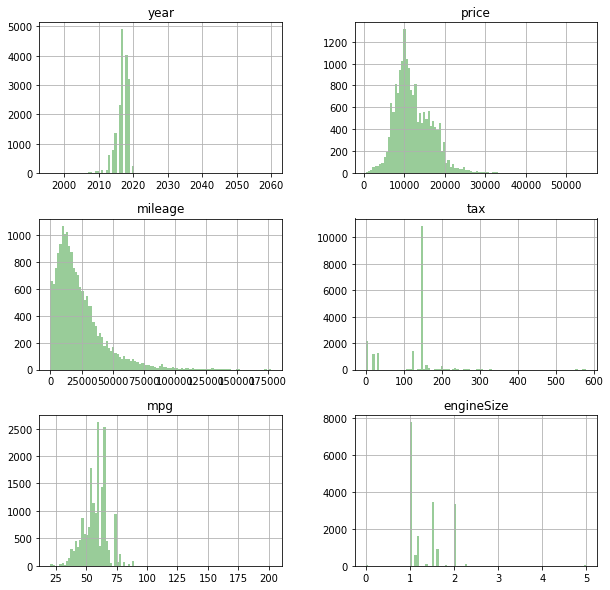

In [25]:
cars.hist(bins=100, figsize=(10,10),color = 'green', alpha = 0.4)
plt.show()

### 범주형 변수 시각화

In [26]:
cars['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

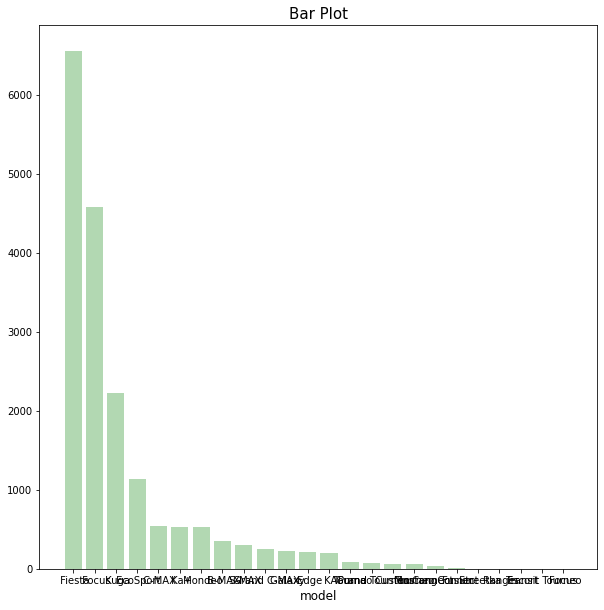

In [27]:
bar_df = cars["model"].value_counts().reset_index()
plt.figure(figsize=(10,10))
plt.title("Bar Plot", fontsize=15)
plt.bar(bar_df["index"], bar_df["model"],color='g', alpha=.3)
plt.xlabel("model", fontsize=12)
plt.show()


In [28]:
cars['transmission'].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

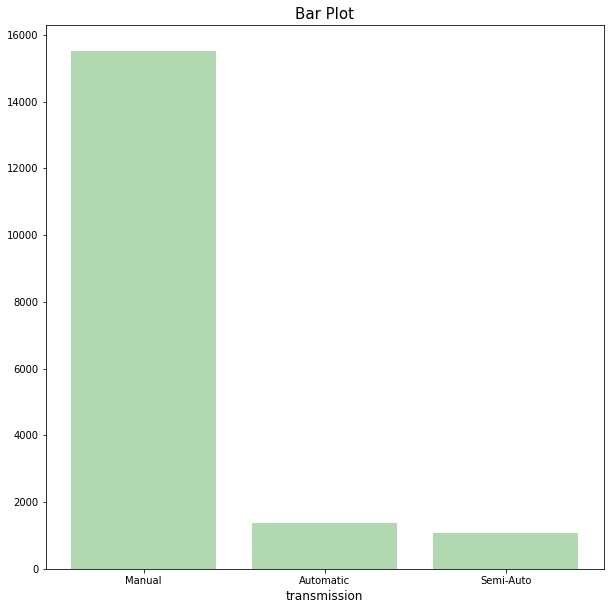

In [29]:
bar_df = cars["transmission"].value_counts().reset_index()
plt.figure(figsize=(10,10))
plt.title("Bar Plot", fontsize=15)
plt.bar(bar_df["index"], bar_df["transmission"],color='g', alpha=.3)
plt.xlabel("transmission", fontsize=12)
plt.show()

In [30]:
cars['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

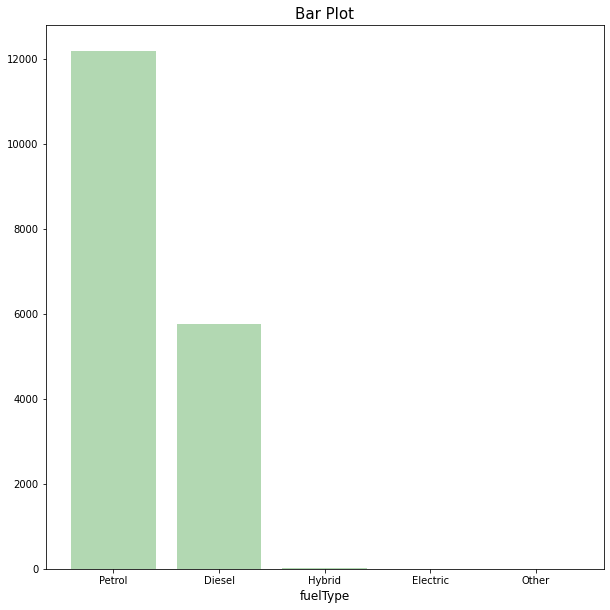

In [31]:
bar_df = cars["fuelType"].value_counts().reset_index()
plt.figure(figsize=(10,10))
plt.title("Bar Plot", fontsize=15)
plt.bar(bar_df["index"], bar_df["fuelType"],color='g', alpha=.3)
plt.xlabel("fuelType", fontsize=12)
plt.show()

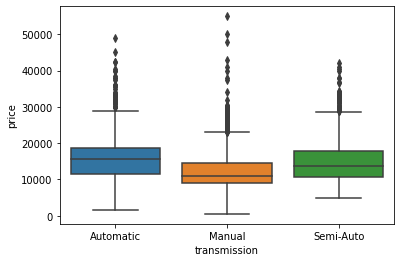

In [32]:
sns.boxplot(x='transmission',y='price', data= cars)

## 2. 데이터 전처리

### 1. year : 2060년 >> 2006년

In [33]:
cars.loc[17726, 'year'] = 2006 #17727번째 행의 year 항목을 2006으로 변경
cars.loc[17726, 'year']

2006

### 2. tax : 0 >> 모델 별 중앙값으로 대체

- 0인 값을 결측치로 대체 후
- 결측치에 대해서 중앙값으로 대체

In [34]:
cars['tax'] = cars['tax'].replace(0, np.NaN)
cars['tax'].unique()

array([150., 145.,  nan,  20., 160., 125.,  30., 235., 240., 200., 165.,
       140., 570., 205., 260., 580., 135., 265., 300., 195., 120., 555.,
       325., 155., 270., 115., 110., 190., 210., 185., 330., 230., 220.,
       305., 290.,  22.])

In [35]:
cars['tax'].fillna(cars.groupby('model')['tax'].transform('median'), inplace=True)

In [36]:
cars['tax'].unique() #nan 값이 사라진 것을 볼 수 있음

array([150., 145.,  20., 160., 125.,  30., 235., 240., 200., 165., 140.,
       570., 205., 260., 580., 135., 265., 300., 195., 120., 555., 325.,
       155., 270., 115., 110., 190., 210., 185., 330., 230., 220., 305.,
       290.,  22.])

In [37]:
Fiesta = cars[cars['model']==' Fiesta'] #model이 Fiesta인 자동차 중 tax가 0인 차의 개수
sum(Fiesta['tax']==0) #잘 대체된 것을 볼 수 있음.

0

### 3. engineSize : 0 >> 모델 별 중앙값으로 대체

In [38]:
cars['engineSize'] = cars['engineSize'].replace(0, np.NaN)
cars['engineSize'].unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       3.2, nan, 1.7])

In [39]:
cars['engineSize'].fillna(cars.groupby('model')['engineSize'].transform('median'), inplace=True)

In [40]:
cars['engineSize'].unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       3.2, 1.7])

In [41]:
Fiesta = cars[cars['model']==' Fiesta'] #model이 Fiesta인 자동차 중 engineSize가 0인 차의 개수
sum(Fiesta['engineSize']==0) #잘 대체된 것을 볼 수 있음.

0

### 4. 이상치 제거

In [42]:
def find_outlier(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  
  lowest = q1 - 1.5*iqr
  highest = q3 + 1.5*iqr

  outlier_index = df[column][(df[column]<lowest) | (df[column]>highest)].index
  return outlier_index

In [43]:
index = find_outlier(cars, 'price')
print(len(index))
print(len(cars))

286
17966


In [44]:
cars.drop(index,inplace=True)
print(len(cars))

17680


### 5. 범주형 변수 encoding

- one-hot encoding : 각 범주를 0,1로 표현. 범주의 수만큼 새로운 변수가 생성되므로, 범주가 많은 경우 생성되는 변수의 수가 너무 많아져 모델의 성능을 저하시킬 우려가 있음.
- binary encoding : one-hot encoding과 동일하게 각 범주를 0,1로 표현하지만 n개의 범주에 대해서 log(base 2)^n개의 변수를 생성함. (ex. 01 10 11 등) one-hot Encoding에 비교하면, 훨씬 더 적은 수의 칼럼을 필요로 함.
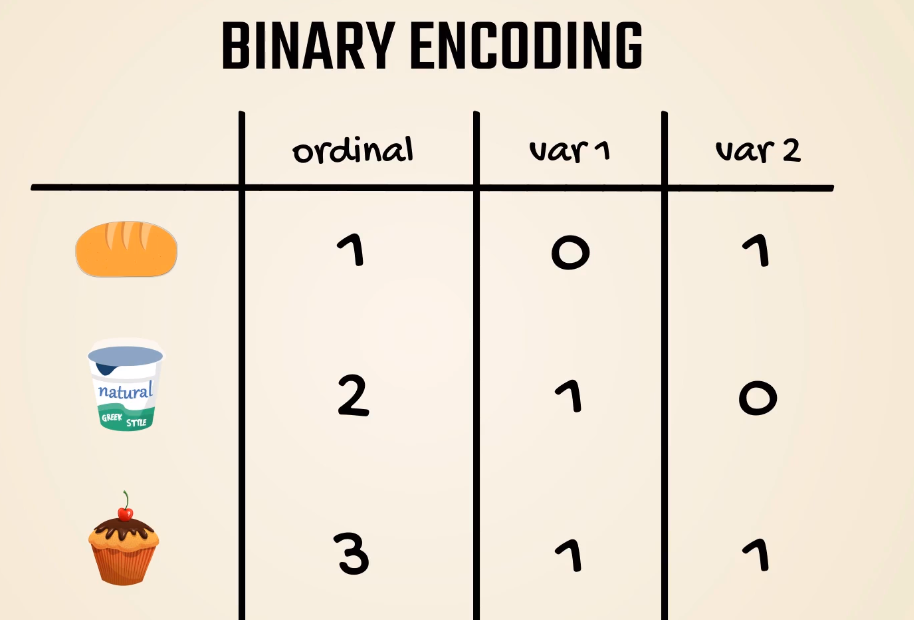

In [45]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()

In [47]:
categorical = cars.loc[:,["model", "transmission", "fuelType"]]
categorical = be.fit_transform(categorical)
categorical.head()

,model_0,model_1,model_2,model_3,model_4,transmission_0,transmission_1,fuelType_0,fuelType_1,fuelType_2
0,0,0,0,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1
2,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,1,1,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1


In [48]:
cars = pd.concat([cars, categorical], axis=1)
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_0,model_1,model_2,model_3,model_4,transmission_0,transmission_1,fuelType_0,fuelType_1,fuelType_2
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,0,0,0,0,1,0,1,0,0,1
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,0,0,0,1,0,1,0,0,0,1
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,0,0,0,1,0,1,0,0,0,1
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,0,0,0,0,1,1,0,0,0,1
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,0,0,0,0,1,0,1,0,0,1


In [49]:
del cars['model']
del cars['transmission']
del cars['fuelType']
cars.head()

,year,price,mileage,tax,mpg,engineSize,model_0,model_1,model_2,model_3,model_4,transmission_0,transmission_1,fuelType_0,fuelType_1,fuelType_2
0,2017,12000,15944,150.0,57.7,1.0,0,0,0,0,1,0,1,0,0,1
1,2018,14000,9083,150.0,57.7,1.0,0,0,0,1,0,1,0,0,0,1
2,2017,13000,12456,150.0,57.7,1.0,0,0,0,1,0,1,0,0,0,1
3,2019,17500,10460,145.0,40.3,1.5,0,0,0,0,1,1,0,0,0,1
4,2019,16500,1482,145.0,48.7,1.0,0,0,0,0,1,0,1,0,0,1
